In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [5]:
red = pd.read_csv("../data/wine+quality/winequality-red.csv", sep=';')
white = pd.read_csv("../data/wine+quality/winequality-white.csv", sep=';')

# Optionally add a column to distinguish them
red['type'] = 'red'
white['type'] = 'white'

df = pd.concat([red, white], ignore_index=True)
df = pd.get_dummies(df, columns=['type'], drop_first=True)  # e.g., creates 'type_white' column
X = df.drop(['quality'], axis=1)
y = df['quality']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [3]:


model = XGBClassifier(
    objective='multi:softprob',
    num_class=10,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train, y_train)

/opt/anaconda3/envs/sago/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:14:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=10, ...)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.24      0.09      0.13        43
           2       0.70      0.69      0.70       428
           3       0.66      0.75      0.70       567
           4       0.63      0.61      0.62       216
           5       0.88      0.36      0.51        39
           6       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.44      0.36      0.38      1300
weighted avg       0.66      0.67      0.66      1300



/opt/anaconda3/envs/sago/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/sago/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/sago/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


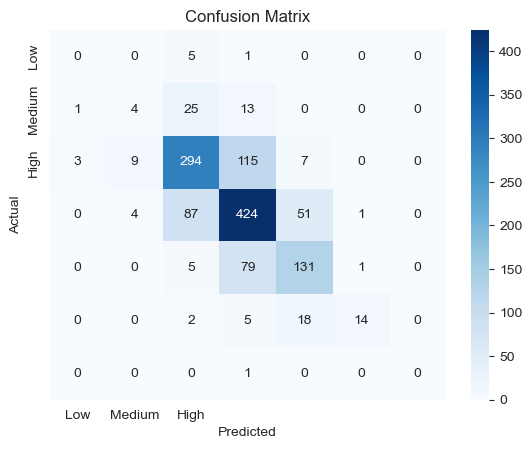

In [4]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

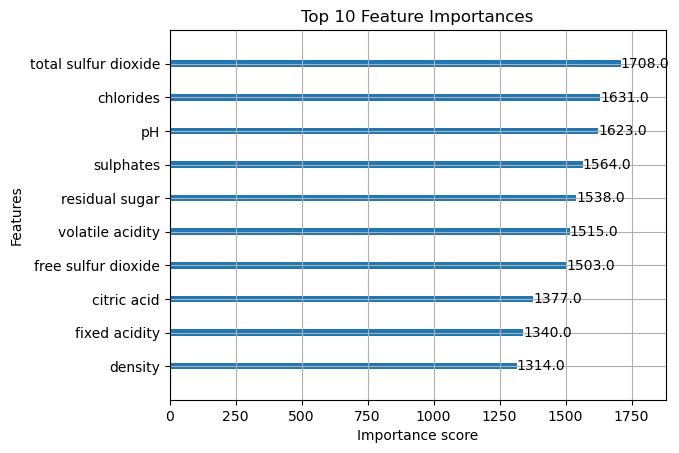

In [15]:
model.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

In [6]:
param_dist = {
    'n_estimators':        [100, 200, 400, 800],
    'learning_rate':       [0.01, 0.05, 0.1, 0.2],
    'max_depth':           [3, 5, 7, 9],
    'subsample':           [0.6, 0.8, 1.0],
    'colsample_bytree':    [0.6, 0.8, 1.0],
    'gamma':               [0, 0.1, 0.2, 0.5],
    'min_child_weight':    [1, 3, 5]
}

In [10]:
model2 = XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_train)),
    use_label_encoder=True,
    eval_metric='mlogloss',
    random_state=42
)

rand_search = RandomizedSearchCV(
    estimator=model2,
    param_distributions=param_dist,
    n_iter=50,              # number of random combos to try
    scoring='accuracy',     # or 'neg_log_loss'
    cv=3,                   # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rand_search.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/opt/anaconda3/envs/sago/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:18:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/sago/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:18:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/sago/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:18:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/sago/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:18:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=7, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 400, 800],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [11]:
print("Best params:", rand_search.best_params_)
best_model = rand_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best params: {'subsample': 0.8, 'n_estimators': 800, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.33      0.07      0.12        43
           2       0.72      0.70      0.71       428
           3       0.65      0.78      0.71       567
           4       0.66      0.57      0.61       216
           5       1.00      0.28      0.44        39
           6       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.48      0.34      0.37      1300
weighted avg       0.67      0.68      0.66      1300



/opt/anaconda3/envs/sago/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/sago/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/sago/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
